# Quantum Statistical Potential

The YAML input file can be found at [input_file](./input_files/C_T10eV.yaml) 

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

# Create the file path to the YAML input file
input_file_name = os.path.join('input_files',  'C_T10eV.yaml')

In [2]:
pre = PreProcess(input_file_name)
pre.setup(read_yaml=True)
# pre.run(loops = 100, timing = True,
#     pppm_estimate=False,
#     timing_study = False)







  _________             __                   
 /   _____/____ _______|  | _______    ______
 \_____  \\__  \\_  __ \  |/ /\__  \  /  ___/
 /        \/ __ \|  | \/    <  / __ \_\___ \ 
/_______  (____  /__|  |__|_ \(____  /____  >
        \/     \/           \/     \/     \/ 


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




/Users/silves28/Documents/Codes/sarkas/sarkas/potentials/qsp.py:525: AlgorithmWarning: Total net charge is not zero.
  warn("Total net charge is not zero.", category=AlgorithmWarning)




********************************************************************************
                                 Preprocessing                                  
********************************************************************************

Job ID: doubleC10eV
Job directory: SarkasSimulations/doubleC10eV
PreProcessing directory: 
SarkasSimulations/doubleC10eV/PreProcessing

Equilibration dumps directory: 
SarkasSimulations/doubleC10eV/PreProcessing/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/doubleC10eV/PreProcessing/Production/dumps

Equilibration Thermodynamics file: 
SarkasSimulations/doubleC10eV/PreProcessing/Equilibration/EquilibrationEnergy_doubleC10eV.csv
Production Thermodynamics file: 
SarkasSimulations/doubleC10eV/PreProcessing/Production/ProductionEnergy_doubleC10eV.csv

PARTICLES:
Total No. of particles = 8000
No. of species = 2
Species ID: 0
	Name: e
	No. of particles = 6000
	Number density = 3.306480e+23 [N/cc]
	Atomic weight = 5.446170e-04 [a.

In [3]:
pre.parameters.total_num_density, pre.parameters.total_num_ptcls/(pre.parameters.pbox_lengths.prod())

(4.408640001220164e+23, 4.408640001220152e+23)

In [4]:
pre.parameters.box_lengths, pre.parameters.pbox_lengths

(array([4.17139946e-07, 2.08569973e-07, 2.08569973e-07]),
 array([2.62781699e-07, 2.62781699e-07, 2.62781699e-07]))

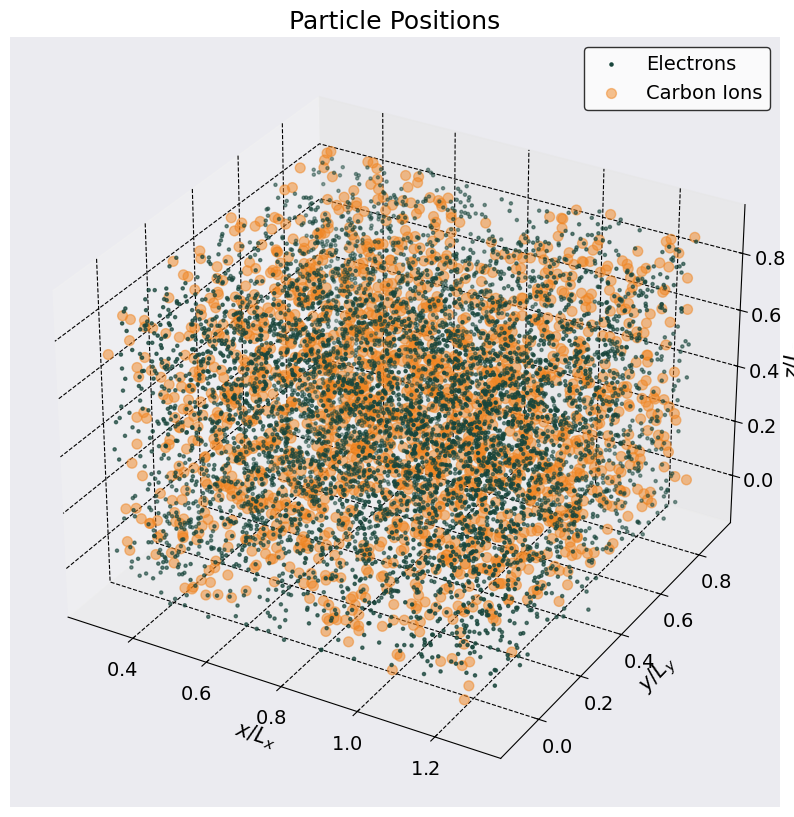

In [5]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the positions from pre.particles.pos
positions = pre.particles.pos/pre.parameters.pbox_lengths

# Create a new figure and 3D axes
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the particle positions as scatter points
ax.scatter(positions[:pre.parameters.species_num[0], 0], positions[:pre.parameters.species_num[0], 1], positions[:pre.parameters.species_num[0], 2], s=5, label = 'Electrons')
ax.scatter(positions[pre.parameters.species_num[0]:, 0], positions[pre.parameters.species_num[0]:, 1], positions[pre.parameters.species_num[0]:, 2], s=50, alpha=0.5, label = 'Carbon Ions')

ax.legend()
# Set labels and title
ax.set_xlabel(r'$x/L_x$')
ax.set_ylabel(r'$y/L_y$')
ax.set_zlabel(r'$z/L_z$')
ax.set_title('Particle Positions')

# Show the plot
plt.show()

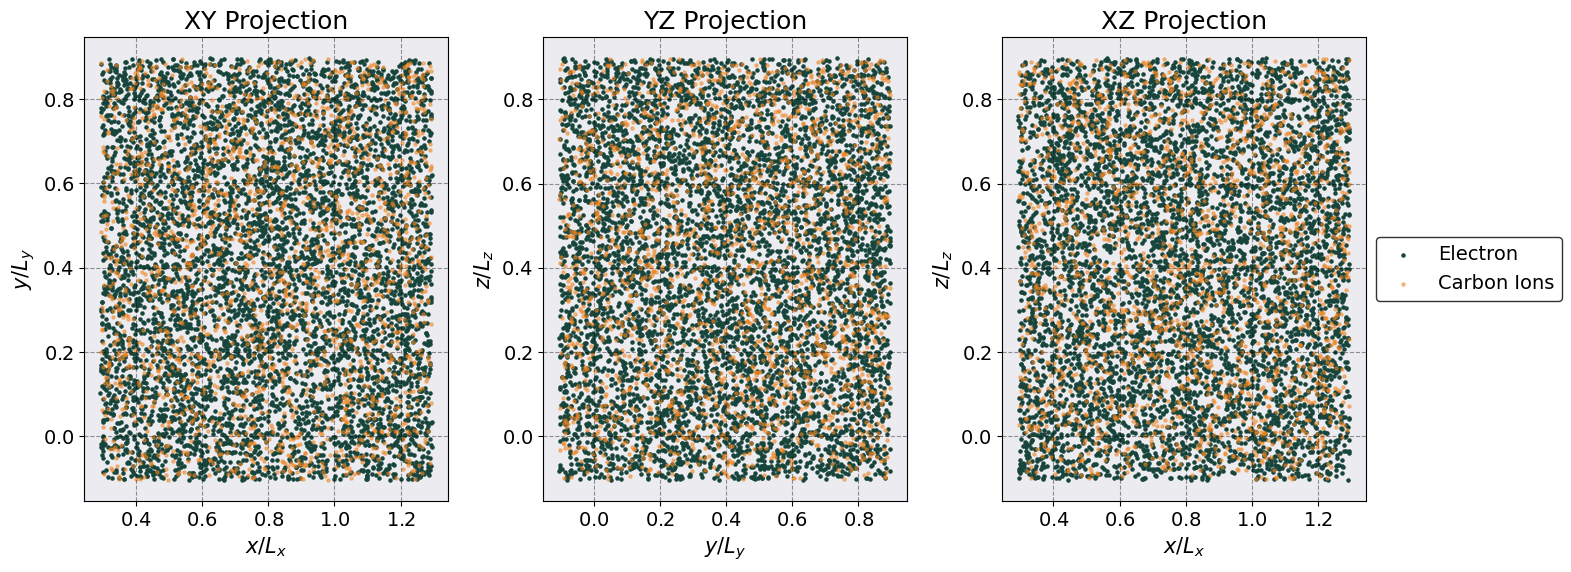

In [8]:
names = pre.particles.names

# Create subplots for XY, YZ, and XZ projections
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# XY projection
axs[0].scatter(positions[names == 'e', 0], positions[names == 'e', 1], label='Electron', s=5)
axs[0].scatter(positions[names == 'C', 0], positions[names == 'C', 1], label='Carbon Ions', s=5, alpha = 0.5)
axs[0].set_xlabel(r'$x/L_x$')
axs[0].set_ylabel(r'$y/L_y$')
axs[0].set_title('XY Projection')

# YZ projection
axs[1].scatter(positions[names == 'e', 1], positions[names == 'e', 2],  label='Electron', s=5)
axs[1].scatter(positions[names == 'C', 1], positions[names == 'C', 2], label='Carbon Ions', s=5, alpha = 0.5)
axs[1].set_xlabel(r'$y/L_y$')
axs[1].set_ylabel(r'$z/L_z$')
axs[1].set_title('YZ Projection')

# XZ projection
axs[2].scatter(positions[names == 'e', 0], positions[names == 'e', 2],  label='Electron', s=5)
axs[2].scatter(positions[names == 'C', 0], positions[names == 'C', 2],label='Carbon Ions', s=5, alpha = 0.5)
axs[2].set_xlabel(r'$x/L_x$')
axs[2].set_ylabel(r'$z/L_z$')
axs[2].set_title('XZ Projection')

# Move the legend outside the axis
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and display the plots
plt.tight_layout()
plt.show()